# Logistic Regression
## ME18B114 - Prajwal Sahu

### Problem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912,
during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding
with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in
the death of 1502 out of 2224 passengers and crew. While there was some element of luck
involved in surviving, it seems some groups of people were more likely to survive than others. In
this challenge, we ask you to build a predictive model that answers the question: “what sorts of
people were more likely to survive?” using passenger data (ie name, age, gender,
socio-economic class, etc).


Two similar datasets include passenger information like name, age, gender, socio-economic
class, etc. One dataset is titled “train.csv” and the other is titled “test.csv”. The train file will
contain the details of a subset of the passengers on board (891 to be exact) and importantly, will
reveal whether they survived or not, also known as the “ground truth”. The test file dataset
contains similar information but does not disclose the “ground truth” for each passenger. It’s
your job to predict these outcomes.

`Survival`- Survival in the crash, 0 = No, 1 = Yes.

`Pclass` - Ticket class of the Passenger, 1 = 1st, 2 = 2nd, 3 = 3rd class.

`Sex` - Male or Female.

`Age` - Age in years.

`Sibsp` - Number of siblings or spouses aboard the Titanic.

`Parch `- Number of parents or children aboard the Titanic.

`Ticket` - Ticket number.

`Fare` - Passenger fare.

`Cabin` - Cabin number.

`Embarked` - Port of Embarkation out of Cherbourg, Queenstown, and Southampton.




## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')


## Importing Data-sets

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking for missing values

<AxesSubplot:>

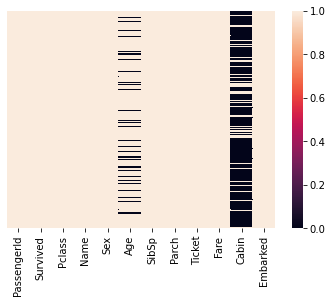

In [9]:
sns.heatmap(train.notnull(),yticklabels=False,cmap ='rocket' )

A lot of cabin data is missing, we can drop it.
The missing data on age can be imputed.

<AxesSubplot:>

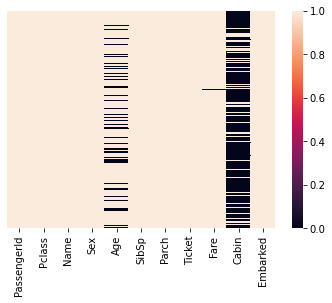

In [10]:

sns.heatmap(test.notnull(),yticklabels=False,cmap ='rocket' )

In [11]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

## Cleaning and Visualizing the numeric variables

### Age


<AxesSubplot:xlabel='Age', ylabel='Count'>

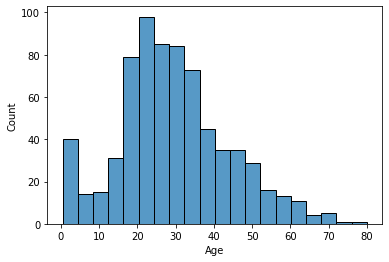

In [12]:
sns.color_palette("flare", as_cmap=True)
sns.histplot(train.Age,palette='flare')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

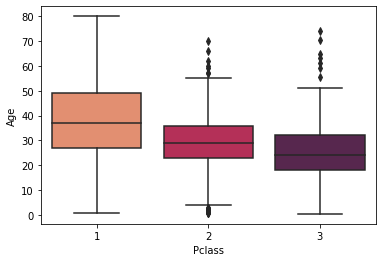

In [13]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='rocket_r')

We see that age depends on the class. Elder people prefer to travel first class.

In [14]:
median_train = train.Age.groupby(train['Pclass']).median()

In [15]:
median_test = test.Age.groupby(test['Pclass']).median()

In [16]:
median_train

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [17]:
median_test

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

#### Imputing Age values class wise

In [18]:
def impute_train(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24
    else:
        return Age

In [19]:
def impute_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 26.5

        else:
            return 24
    else:
        return Age

In [20]:
train['Age'] = train[['Age','Pclass']].apply(impute_train,axis=1)


In [21]:
test['Age'] = test[['Age','Pclass']].apply(impute_test,axis=1)

In [22]:
train['Survived'].groupby(train['Age']).mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Survived'>

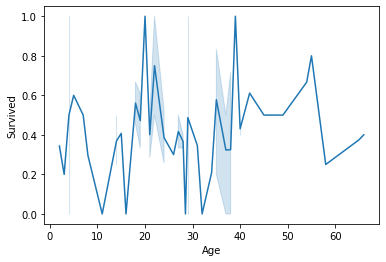

In [23]:
sns.lineplot(x='Age',y=train['Survived'].groupby(train['Age']).mean(),data=train,palette = 'Reds')

### Fare

In [24]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

Only 1 datapoint of fare is missing

In [26]:
test['Fare']=test.Fare.fillna(test.Fare.median())

In [27]:
train.Fare.mean()

32.2042079685746

In [28]:
median_fare = train['Fare'].groupby(train['Pclass']).mean()
median_fare

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

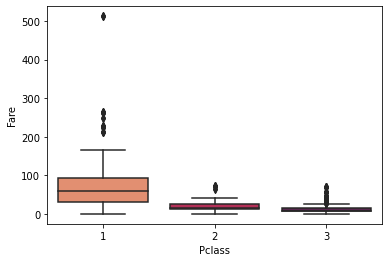

In [29]:
sns.boxplot(x='Pclass',y='Fare',data=train,palette='rocket_r')

In [30]:
train.drop(train[train['Fare'] > 500].index, inplace = True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

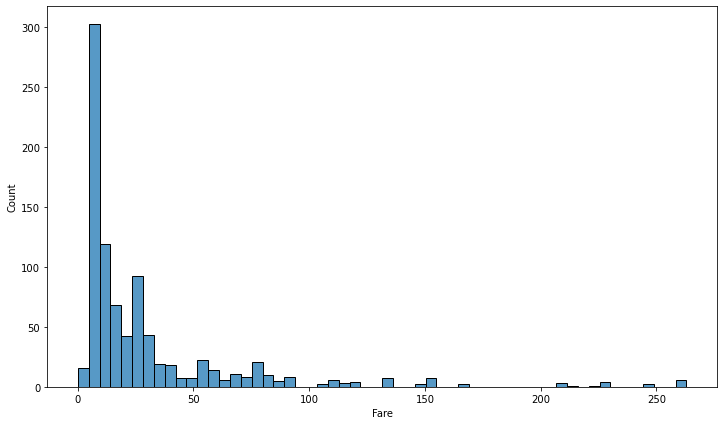

In [31]:
plt.figure(figsize=(12,7))
sns.histplot(train.Fare)

### PClass

<AxesSubplot:xlabel='Survived', ylabel='count'>

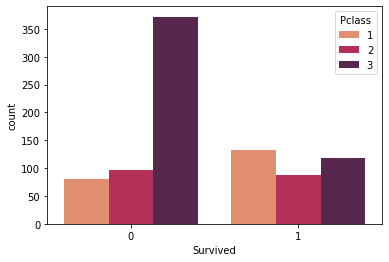

In [32]:
sns.countplot(x='Survived',data=train,hue='Pclass',palette='rocket_r')

In [33]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.624413
2    0.472826
3    0.242363
Name: Survived, dtype: float64

3rd Class have lesser chance of survival comparatively. 



### Travelling alone or with relatives

We will combine Siblings and Parents columns.

In [34]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'Travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'Travelled_alone'] = 'Yes'
    
train['Travelled_alone'].value_counts()

Yes    535
No     353
Name: Travelled_alone, dtype: int64

In [35]:
test['Travelled_alone'].value_counts()

Yes    253
No     165
Name: Travelled_alone, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

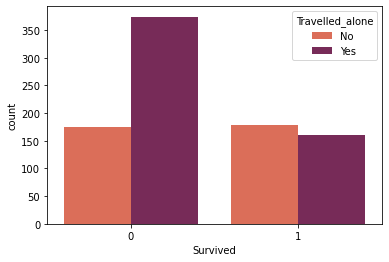

In [36]:
sns.countplot(x='Survived',data=train,hue="Travelled_alone",palette='rocket_r')

In [37]:
train['Survived'].groupby(train['Travelled_alone']).mean()

Travelled_alone
No     0.504249
Yes    0.300935
Name: Survived, dtype: float64

In [38]:
def f(x, term):
    if x == term:
        return 1
    else:
        return 0

In [39]:
train['Travelled_alone'] = train.Travelled_alone.apply(lambda x: f(x, term='Yes'))
test['Travelled_alone'] = test.Travelled_alone.apply(lambda x: f(x, term='Yes'))

## Checking the balance in data

<AxesSubplot:xlabel='Survived', ylabel='count'>

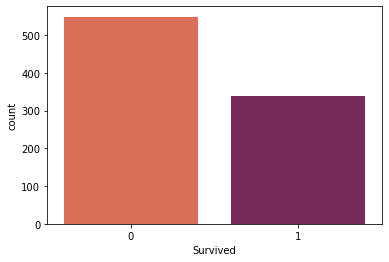

In [40]:
sns.countplot(x='Survived',data=train,palette='rocket_r')

## Feature Engineering for Categorical Variables

### Sex

We check whether survival depends upon gender or not.


<AxesSubplot:xlabel='Survived', ylabel='count'>

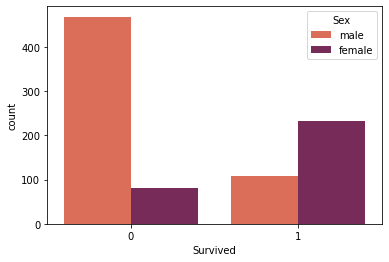

In [41]:
sns.countplot(x='Survived',data=train,hue="Sex",palette='rocket_r')

In [42]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.741214
male      0.186087
Name: Survived, dtype: float64

Females had a better chance of survival.



In [43]:
train['Sex'].value_counts()

male      575
female    313
Name: Sex, dtype: int64

In [44]:
test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [45]:
def f(x, term):
    if x == term:
        return 1
    else:
        return 0

In [46]:
train['male'] = train.Sex.apply(lambda x: f(x, term='male'))
test['male'] = test.Sex.apply(lambda x: f(x, term='male'))

In [47]:
train['female'] = train.Sex.apply(lambda x: f(x, term='female'))
test['female'] = test.Sex.apply(lambda x: f(x, term='female'))

In [48]:
train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

### Embarked

The passengers had 3 embark points, denoted by S, Q and C.

In [49]:
train['Embarked'].value_counts()

S    644
C    165
Q     77
Name: Embarked, dtype: int64

In [50]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

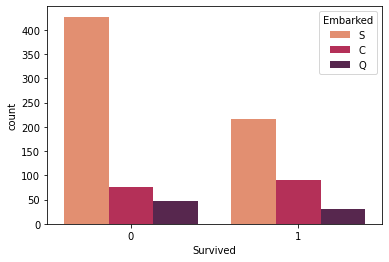

In [51]:
sns.countplot(x='Survived',data=train,hue="Embarked",palette='rocket_r')

There seems to be a clear trend of Southampton passengers having higher chance of survival

In [52]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.545455
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [53]:
train['EmbarkedS'] = train.Embarked.apply(lambda x: f(x, term='S'))
test['EmbarkedS'] = test.Embarked.apply(lambda x: f(x, term='S'))

In [54]:
train['EmbarkedC'] = train.Embarked.apply(lambda x: f(x, term='C'))
test['EmbarkedC'] = test.Embarked.apply(lambda x: f(x, term='C'))

In [55]:
train['EmbarkedQ'] = train.Embarked.apply(lambda x: f(x, term='Q'))
test['EmbarkedQ'] = test.Embarked.apply(lambda x: f(x, term='Q'))

In [56]:
train.drop(["Embarked"],axis=1, inplace=True)
test.drop(["Embarked"],axis=1, inplace=True)

There is no point in keeping Name and Ticket

In [57]:
train.drop(['Name','Ticket'],axis=1,inplace=True)
test.drop(['Name','Ticket'],axis=1,inplace=True)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,Travelled_alone,male,female,EmbarkedS,EmbarkedC,EmbarkedQ
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1,0,0
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,1,0,1,1,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,1,1,0,0
4,5,0,3,35.0,0,0,8.0500,0,1,1,0,1,0,0


In [59]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,relatives,Travelled_alone,male,female,EmbarkedS,EmbarkedC,EmbarkedQ
0,892,3,34.5,0,0,7.8292,0,1,1,0,0,0,1
1,893,3,47.0,1,0,7.0000,1,0,0,1,1,0,0
2,894,2,62.0,0,0,9.6875,0,1,1,0,0,0,1
3,895,3,27.0,0,0,8.6625,0,1,1,0,1,0,0
4,896,3,22.0,1,1,12.2875,2,0,0,1,1,0,0


## Correlation Check

In [60]:
train.drop(['SibSp','Parch'],axis=1,inplace=True)
test.drop(['SibSp','Parch'],axis=1,inplace=True)

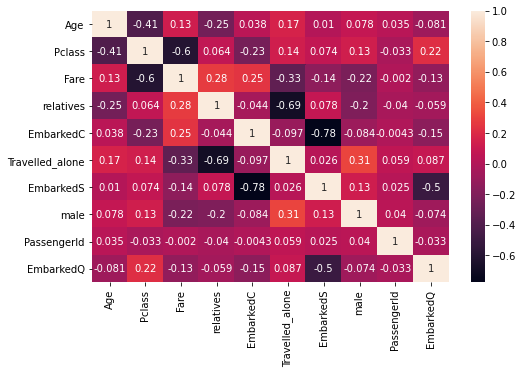

In [61]:
Selected_features = ['Age', 'Pclass', 'Fare', 'relatives', 'EmbarkedC','Travelled_alone',
                     'EmbarkedS', 'male', 'PassengerId','EmbarkedQ']
P = train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(P.corr(), annot=True, cmap="rocket")
plt.show()

No high correlation is witnessed among our variables

## Scaling the Data

Logistic Regression works better on scaled data

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
train_numerical_features = list(train.select_dtypes(include=['int64', 'float64', 'int32']).columns)
train_numerical_features

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'Fare',
 'relatives',
 'Travelled_alone',
 'male',
 'female',
 'EmbarkedS',
 'EmbarkedC',
 'EmbarkedQ']

In [64]:
del train_numerical_features[0:2]
train_numerical_features

['Pclass',
 'Age',
 'Fare',
 'relatives',
 'Travelled_alone',
 'male',
 'female',
 'EmbarkedS',
 'EmbarkedC',
 'EmbarkedQ']

In [65]:
scaler = StandardScaler()
train = pd.DataFrame(data = train)
train[train_numerical_features] = scaler.fit_transform(train[train_numerical_features])

In [66]:
train

,PassengerId,Survived,Pclass,Age,Fare,relatives,Travelled_alone,male,female,EmbarkedS,EmbarkedC,EmbarkedQ
0,1,0,0.824123,-0.531540,-0.566959,0.057886,-1.231089,0.737799,-0.737799,0.615534,-0.477719,-0.308131
1,2,1,-1.575290,0.675607,0.989016,0.057886,-1.231089,-1.355382,1.355382,-1.624606,2.093279,-0.308131
2,3,1,0.824123,-0.229753,-0.550557,-0.561424,0.812289,-1.355382,1.355382,0.615534,-0.477719,-0.308131
3,4,1,-1.575290,0.449267,0.547171,0.057886,-1.231089,-1.355382,1.355382,0.615534,-0.477719,-0.308131
4,5,0,0.824123,0.449267,-0.547519,-0.561424,0.812289,0.737799,-0.737799,0.615534,-0.477719,-0.308131
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,-0.375584,-0.154306,-0.427237,-0.561424,0.812289,0.737799,-0.737799,0.615534,-0.477719,-0.308131
887,888,1,-1.575290,-0.757880,-0.014146,-0.561424,0.812289,-1.355382,1.355382,0.615534,-0.477719,-0.308131
888,889,0,0.824123,-0.380646,-0.173308,1.296507,-1.231089,-1.355382,1.355382,0.615534,-0.477719,-0.308131
889,890,1,-1.575290,-0.229753,-0.014146,-0.561424,0.812289,0.737799,-0.737799,-1.624606,2.093279,-0.308131


In [67]:
test_numerical_features = list(test.select_dtypes(include=['int64', 'float64', 'int32']).columns)
test_numerical_features

['PassengerId',
 'Pclass',
 'Age',
 'Fare',
 'relatives',
 'Travelled_alone',
 'male',
 'female',
 'EmbarkedS',
 'EmbarkedC',
 'EmbarkedQ']

In [68]:
del test_numerical_features[0:1]
test_numerical_features

['Pclass',
 'Age',
 'Fare',
 'relatives',
 'Travelled_alone',
 'male',
 'female',
 'EmbarkedS',
 'EmbarkedC',
 'EmbarkedQ']

In [69]:
test = pd.DataFrame(data = test)
test[test_numerical_features] = scaler.fit_transform(test[test_numerical_features])

In [70]:
test

,PassengerId,Pclass,Age,Fare,relatives,Travelled_alone,male,female,EmbarkedS,EmbarkedC,EmbarkedQ
0,892,0.873482,0.393048,-0.497413,-0.553443,0.807573,0.755929,-0.755929,-1.350676,-0.568142,2.843757
1,893,0.873482,1.356309,-0.512278,0.105643,-1.238278,-1.322876,1.322876,0.740370,-0.568142,-0.351647
2,894,-0.315819,2.512223,-0.464100,-0.553443,0.807573,0.755929,-0.755929,-1.350676,-0.568142,2.843757
3,895,0.873482,-0.184909,-0.482475,-0.553443,0.807573,0.755929,-0.755929,0.740370,-0.568142,-0.351647
4,896,0.873482,-0.570214,-0.417492,0.764728,-1.238278,-1.322876,1.322876,0.740370,-0.568142,-0.351647
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.873482,-0.416092,-0.493455,-0.553443,0.807573,0.755929,-0.755929,0.740370,-0.568142,-0.351647
414,1306,-1.505120,0.739822,1.314435,-0.553443,0.807573,-1.322876,1.322876,-1.350676,1.760125,-0.351647
415,1307,0.873482,0.701291,-0.507796,-0.553443,0.807573,0.755929,-0.755929,0.740370,-0.568142,-0.351647
416,1308,0.873482,-0.416092,-0.493455,-0.553443,0.807573,0.755929,-0.755929,0.740370,-0.568142,-0.351647


## Model

### Train Test Split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['PassengerId','Survived'],axis=1), 
                                                    train['Survived'], test_size=0.2, 
                                                    random_state=45)

### Smote for Unbalanced

In [73]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
oversample = SMOTE()
X_train1, y_train1 = oversample.fit_resample(X_train, y_train)

### Training with SMOTE

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logmodel= LogisticRegression(C=100)

In [78]:
logmodel.fit(X_train1,y_train1)

LogisticRegression(C=100)

In [79]:
logmodel.score(X_train1,y_train1)

0.7902097902097902

In [80]:
logmodel.score(X_test,y_test)

0.8258426966292135

In [81]:
coeff_df = pd.DataFrame(logmodel.coef_.flatten(),X_train1.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Pclass,-0.838266
Age,-0.545294
Fare,0.094825
relatives,-0.736576
Travelled_alone,-0.272481
male,-0.616970
female,0.616970
EmbarkedS,-1.453309
EmbarkedC,-1.202270
EmbarkedQ,-0.882946


### Predictions and Metrics

In [82]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [83]:
pred_test = logmodel.predict(X_test)
pred_train = logmodel.predict(X_train1)

### Training error

In [84]:
cm = confusion_matrix(y_train1, pred_train)
cm

array([[350,  79],
       [101, 328]], dtype=int64)

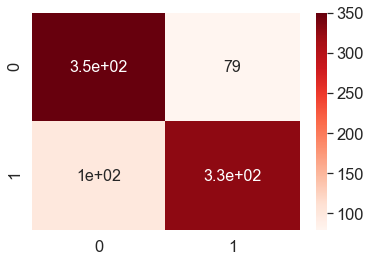

In [85]:
df_cm = pd.DataFrame(cm)

sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap="Reds") # font size

plt.show()

In [86]:
print(classification_report(y_train1,pred_train))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       429
           1       0.81      0.76      0.78       429

    accuracy                           0.79       858
   macro avg       0.79      0.79      0.79       858
weighted avg       0.79      0.79      0.79       858



### Testing set

In [87]:
cm_test = confusion_matrix(y_test, pred_test)
cm_test

array([[101,  19],
       [ 12,  46]], dtype=int64)

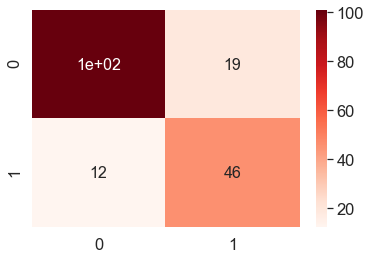

In [88]:
df_cm = pd.DataFrame(cm_test)

sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap="Reds") # font size

plt.show()

In [89]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       120
           1       0.71      0.79      0.75        58

    accuracy                           0.83       178
   macro avg       0.80      0.82      0.81       178
weighted avg       0.83      0.83      0.83       178



### Training

In [90]:
logmodel= LogisticRegression(C=10)

In [91]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=10)

In [92]:
logmodel.score(X_train,y_train)

0.8

In [93]:
logmodel.score(X_test,y_test)

0.8426966292134831

In [94]:
coeff_df = pd.DataFrame(logmodel.coef_.flatten(),X_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Pclass,-0.958032
Age,-0.516924
Fare,0.015407
relatives,-0.581723
Travelled_alone,-0.266387
male,-0.624043
female,0.624043
EmbarkedS,-0.735827
EmbarkedC,-0.584669
EmbarkedQ,-0.360501


### Predictions and Metrics

In [95]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [96]:
pred_test = logmodel.predict(X_test)
pred_train = logmodel.predict(X_train)

### Training error

In [97]:
cm = confusion_matrix(y_train, pred_train)
cm

array([[369,  60],
       [ 82, 199]], dtype=int64)

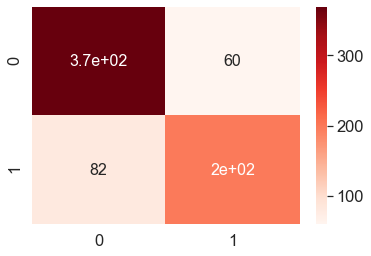

In [98]:
df_cm = pd.DataFrame(cm)

sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap="Reds") # font size

plt.show()

In [99]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       429
           1       0.77      0.71      0.74       281

    accuracy                           0.80       710
   macro avg       0.79      0.78      0.79       710
weighted avg       0.80      0.80      0.80       710



### Testing set

In [100]:
cm_test = confusion_matrix(y_test, pred_test)
cm_test

array([[109,  11],
       [ 17,  41]], dtype=int64)

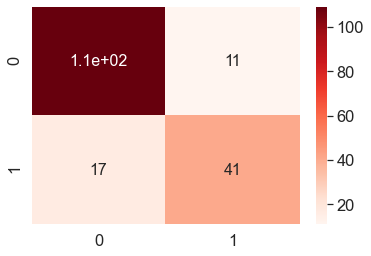

In [101]:
df_cm = pd.DataFrame(cm_test)

sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap="Reds") # font size

plt.show()

In [102]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       120
           1       0.79      0.71      0.75        58

    accuracy                           0.84       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.84      0.84      0.84       178



## Random Search CV

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

lr_random =RandomizedSearchCV(logmodel, grid_values, cv= 5)

In [105]:
lr_random.fit(X_train1,y_train1)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(C=10),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']})

In [106]:
lr_random.best_estimator_

LogisticRegression(C=100)

## XGBoost

In [107]:
from xgboost import XGBClassifier

In [108]:
xgb = XGBClassifier()

In [109]:
xgb.fit(X_train1, y_train1)

[12:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
xgb.score(X_train1, y_train1)

0.9755244755244755

In [111]:
xgb.score(X_test, y_test)

0.8258426966292135

In [112]:
pred = logmodel.predict(test.drop(['PassengerId'],axis=1))

In [267]:
predicted_data=pd.DataFrame(pred,columns=['Survival'])

In [268]:
me18b114_prajwal = pd.concat([test,predicted_data],axis=1)

In [271]:
me18b114_prajwal.to_csv('me18b114_assign2_test_predictions.csv')